In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
%matplotlib inline

from models import MLP
from data import gen_rnd_ds
from losses import SquaredClassification
from block_analysis import block_hessian, curvature_effects, block_hessian_diag, block_hessian_off_diag

## Helpers

In [2]:
def get_model_ds_loss():    
    model =  MLP(inp_dim, hid_dim, out_dim, nlayer, bias, mode).cuda(device)
    ds = gen_rnd_ds(inp_dim, inp_mean, inp_var, 
                   out_dim, nsamp, device)
    loss_fn = SquaredClassification(out_dim)
    return model, ds, loss_fn

def pp(lr, delta, h, H):
    rel = abs((h.item() - H.sum().item()) / min(abs(H.sum().item()), abs(h.item())))
    print(f"LR {lr:.2E} \t || Delta={delta:.2E}\t ||Error={rel:.2E}  \t|| h={h.item()} \t|| H={H.sum().item()}")

def lr_range(model, ds, loss_fn, start=-8, stop=8, step=1, log_scale=False):
    for lr in range(start, stop, step):
        if log_scale:
            lr = 10**lr
        H = block_hessian(model, ds, loss_fn, lr)
        delta, h = curvature_effects(model, ds, loss_fn, lr)
        pp(lr, delta, h, H)

## Params

In [8]:
# Model
mode = "linear"
bias = False
nlayer = 2
inp_dim = 100
hid_dim = 100
out_dim = 10

# Data parameters
nsamp = 100
inp_mean = 0
inp_var = 1

# Others
device = 0

In [12]:
model, ds, loss_fn = get_model_ds_loss()
#lr_range(model, ds, loss_fn, -8, 8, 1, True)
#lr_range(model, ds, loss_fn, 10, 100, 1, False)

In [24]:
for lr in range(10): 
    H = block_hessian(model, ds, loss_fn, lr)
    h = curvature_effects(model, ds, loss_fn, lr)
    print(lr, h.item(), H.sum().item())

0 nan nan
1 0.039547525346279144 0.0537184402346611
2 0.04295935854315758 0.05371849238872528
3 0.04637118801474571 0.05371849983930588
4 0.049783021211624146 0.05371849238872528
5 0.05319485068321228 0.053718503564596176
6 0.05660667642951012 0.053718507289886475
7 0.06001850962638855 0.053718503564596176
8 0.06343034654855728 0.05371851101517677
9 0.06684217602014542 0.05371851474046707


In [19]:
for lr in range(10): 
    H = block_hessian(model, ds, loss_fn, lr)
    h = curvature_effects(model, ds, loss_fn, lr)
    print(lr, h.item(), H.sum().item())

0 nan nan
1 0.0027682632207870483 0.005076628178358078
2 0.00315653532743454 0.0050767287611961365
3 0.003544833976775408 0.005076732020825148
4 0.003933116793632507 0.005076744593679905
5 0.004321407992392778 0.005076759494841099
6 0.004709700588136911 0.005076758563518524
7 0.005097983870655298 0.00507675064727664
8 0.005486276000738144 0.0050767529755830765
9 0.00587456626817584 0.005076766014099121


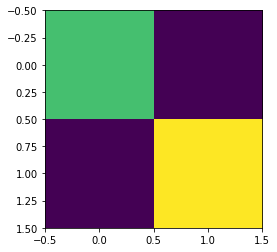

In [47]:
lr = .001
H = block_hessian(model, ds, loss_fn, lr)
plt.imshow(H.cpu().numpy())

In [45]:
H

tensor([[ 0.0020, -0.0030],
        [-0.0030,  0.0041]], device='cuda:0')